## What are Helsinki City bikes?
Helsinki City Bikes are shared bicycles available to the public in Helsinki and Espoo metropolitan areas. The main aim of the Helsinki city bike system is to address the so-called last-mile problem present in all distribution networks. The city bikes were introduced in 2016 as a pilot project with only 46 bike stations available in Helsinki. After becoming popular among the citizens, Helsinki city decided to gradually expand the bike network. In the period between 2017 and 2019, approximately one hundred stations were being added to the network each year. By 2019 the bike network reached its complete state with only 7 stations being added in 2020. As of 2020, there were 3,510 bikes and 350 stations operating in Helsinki and Espoo.

> Since 2016 more than 10.000.000 rides have been made. The total distance of the trips is 25.291.523 kilometres. To put that in perspective 25.3 million kilometres is 65 times the distance to the moon. The total time all residents spent riding the bikes is approximately 280 Years and 4 months.

In order to use the city bikes, citizens purchase access for a day, week or the entire cycling season that lasts from April to November. All passes include an unlimited number of 30-minute bike rides. For an extra fee of 1€/hour, you can use the bike for longer. Bikes are picked up and returned to stations that are located all around Helsinki and Espoo.

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
year = 2021
file_path = os.path.join('data', 'datasets', f'od_helsinki_city_bikes_{year}.csv')
dataframe = pd.read_csv(file_path, low_memory=False)
dataframe.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),departure_longitude,departure_latitude,return_longitude,return_latitude
0,2021-04-30T23:59:54,2021-05-01T00:08:15,16,Liisanpuistikko,2,Laivasillankatu,1885.0,499.0,24.962084,60.174140,24.956347,60.160959
1,2021-04-30T23:59:52,2021-05-01T00:16:16,20,Kaisaniemenpuisto,112,Rautatieläisenkatu,3359.0,984.0,24.942985,60.172951,24.933272,60.201438
2,2021-04-30T23:59:52,2021-05-01T00:13:40,4,Viiskulma,33,Kauppakorkeakoulu,1633.0,824.0,24.941776,60.160986,24.924894,60.171196
3,2021-04-30T23:59:43,2021-05-01T00:23:22,133,Paavalinpuisto,241,Agronominkatu,6459.0,1418.0,24.961438,60.197489,25.032857,60.234053
4,2021-04-30T23:59:41,2021-05-01T00:16:15,20,Kaisaniemenpuisto,112,Rautatieläisenkatu,3210.0,990.0,24.942985,60.172951,24.933272,60.201438


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862102 entries, 0 to 2862101
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   departure            object 
 1   return               object 
 2   departure_id         int64  
 3   departure_name       object 
 4   return_id            int64  
 5   return_name          object 
 6   distance (m)         float64
 7   duration (sec.)      float64
 8   departure_longitude  float64
 9   departure_latitude   float64
 10  return_longitude     float64
 11  return_latitude      float64
dtypes: float64(6), int64(2), object(4)
memory usage: 262.0+ MB


In [4]:
dataframe[['departure','return']] =  dataframe[['departure','return']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862102 entries, 0 to 2862101
Data columns (total 12 columns):
 #   Column               Dtype         
---  ------               -----         
 0   departure            datetime64[ns]
 1   return               datetime64[ns]
 2   departure_id         int64         
 3   departure_name       object        
 4   return_id            int64         
 5   return_name          object        
 6   distance (m)         float64       
 7   duration (sec.)      float64       
 8   departure_longitude  float64       
 9   departure_latitude   float64       
 10  return_longitude     float64       
 11  return_latitude      float64       
dtypes: datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 262.0+ MB


In [5]:
columns = {
    'distance (m)': 'distance',
    'duration (sec.)': 'duration'
}

dataframe = dataframe.rename(columns=columns)
dataframe.sample(5)

,departure,return,departure_id,departure_name,return_id,return_name,distance,duration,departure_longitude,departure_latitude,return_longitude,return_latitude
2165263,2021-08-11 15:20:11,2021-08-11 15:22:36,112,Rautatieläisenkatu,113,Pasilan asema,478.0,144.0,24.933272,60.201438,24.932799,60.198211
293518,2021-05-30 17:19:04,2021-05-30 17:28:40,87,Kustaankatu,204,A.I. Virtasen aukio,2403.0,570.0,24.955976,60.188275,24.962152,60.205577
2426138,2021-09-21 11:34:00,2021-09-21 11:46:10,63,Jätkäsaarenlaituri,17,Varsapuistikko,2591.0,726.0,24.921552,60.161506,24.949519,60.173103
1434566,2021-07-23 16:56:14,2021-07-23 17:00:44,246,Tupasaarentie,259,Petter Wetterin tie,1137.0,269.0,25.015392,60.187998,25.031112,60.193138
673162,2021-05-01 18:05:02,2021-05-01 18:23:23,124,Isoisänsilta,255,Laivalahden puistotie,3943.0,1096.0,24.981793,60.182652,25.031385,60.187958


In [6]:
dataframe[['distance', 'duration']].describe()

,distance,duration
count,2.859707e+06,2.652862e+06
mean,2.332845e+03,1.033770e+03
std,1.419044e+04,1.141223e+04
min,-4.294127e+06,0.000000e+00
25%,1.110000e+03,3.770000e+02
50%,1.947000e+03,6.450000e+02
75%,3.242000e+03,1.050000e+03
max,3.680771e+06,4.889729e+06


In [7]:
dataframe = dataframe[
    (50 < dataframe['distance']) & (dataframe['distance'] < 10000) &
    (120 < dataframe['duration']) & (dataframe['duration'] <  18000)
]

dataframe[['distance', 'duration']].describe()

,distance,duration
count,2.510320e+06,2.510320e+06
mean,2.471948e+03,8.149357e+02
std,1.612963e+03,7.307497e+02
min,5.100000e+01,1.210000e+02
25%,1.229000e+03,4.060000e+02
50%,2.060000e+03,6.670000e+02
75%,3.343000e+03,1.062000e+03
max,9.999000e+03,1.799600e+04


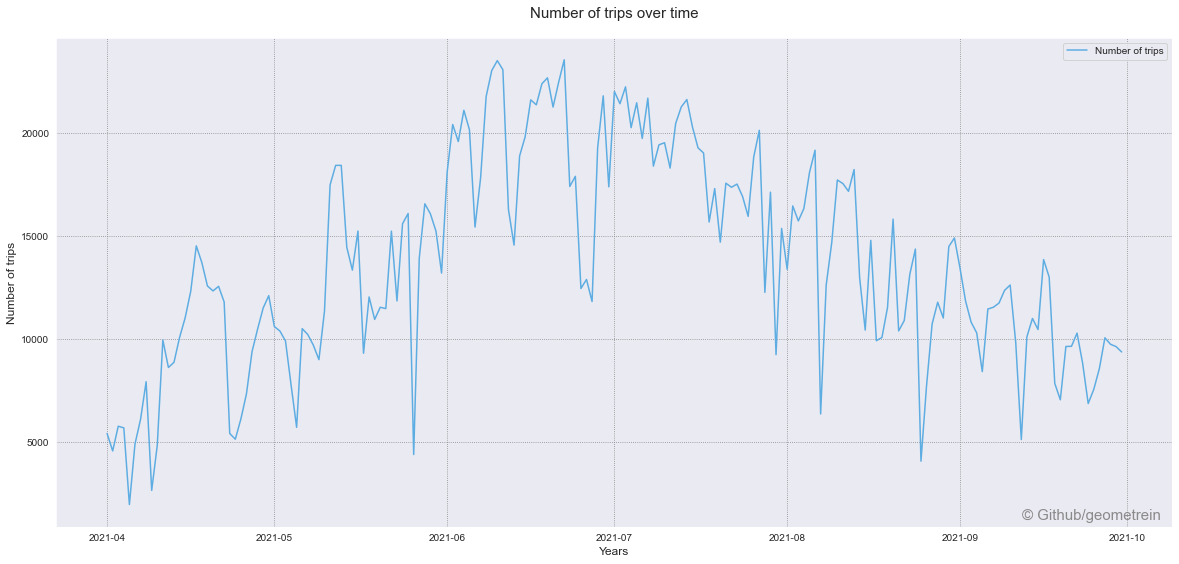

In [8]:
def plot_trips_by_year(input_df: pd.DataFrame) -> None:
    # Data preparations
    df = input_df.copy()
    df_over_time = df.groupby(df['departure'].dt.date).size().reset_index(name='count')

    # Creating Figure
    fig, ax = plt.subplots(figsize=(20,9))
    plt.plot(df_over_time['departure'], df_over_time['count'], color='#5DADE2')

    # Adding Labels
    ax.set_title('Number of trips over time', fontsize= 15, pad= 20)
    ax.set_ylabel('Number of trips', fontsize=12)
    ax.set_xlabel('Years', fontsize=12)

    # Setting up Grid & Legend
    plt.grid(linestyle=':', color='grey')
    plt.legend(['Number of trips'])

    # Adding Watermark
    ax.text(
        x=0.99,
        y=0.01,
        s='© Github/geometrein',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='grey',
        fontsize=15,
        alpha=0.9
    )

    plt.show()

plot_trips_by_year(dataframe)

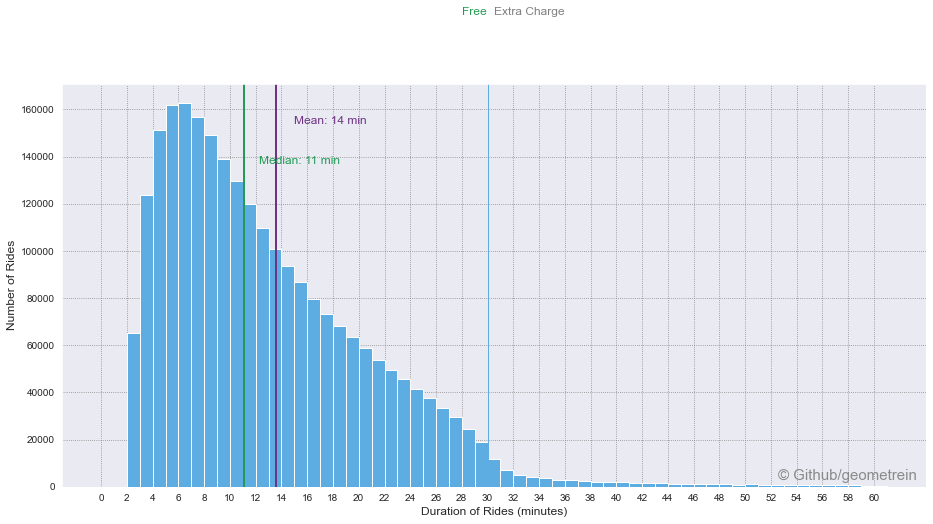

In [9]:
def plot_trips_by_durations(input_df: pd.DataFrame) -> None:
    # Data preparations
    df = input_df.copy()
    df['duration'] = df['duration']/60
    duration_data = df['duration']


    # Creating Figure
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    # Plotting the histogram
    plt.hist(duration_data, bins = range(62), color='#5DADE2', histtype ='bar')

    # Adding median and mean lines
    plt.axvline(df['duration'].mean(), color='#6C3483', linestyle='-', linewidth=2 )
    plt.axvline(df['duration'].median(), color='#239B56', linestyle='-', linewidth=2 )
    plt.axvline(x=30, color='#5DADE2', linestyle='-', linewidth=1 )

    # Adding median and mean texts
    min_ylim, max_ylim = plt.ylim()
    plt.text(df['duration'].mean()*1.1, max_ylim*0.9, 'Mean: {:.0f} min'.format(df['duration'].mean()), color='#6C3483',  fontsize=12)
    plt.text(df['duration'].median()*1.1, max_ylim*0.8, 'Median: {:.0f} min'.format(df['duration'].median()), color='#239B56', fontsize=12)
    plt.text(x= 28, y=200000, s='Free', color='#239B56', fontsize=12)
    plt.text(x= 30.5, y=200000, s='Extra Charge', color='grey', fontsize=12)

    # Setting ticks on x-axis
    ticks = range(0, 62, 2)
    plt.xticks(ticks)

    # Labeling Axes
    plt.xlabel('Duration of Rides (minutes)', fontsize=12, x=0.5)
    plt.ylabel('Number of Rides', fontsize=12)

    # Adding Grid
    plt.grid(linestyle=':', color='grey')

    # Watermark
    ax.text(
        x=0.99,
        y=0.01,
        s='© Github/geometrein',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='grey',
        fontsize=15,
        alpha=0.9
    )

    plt.show()

plot_trips_by_durations(dataframe)

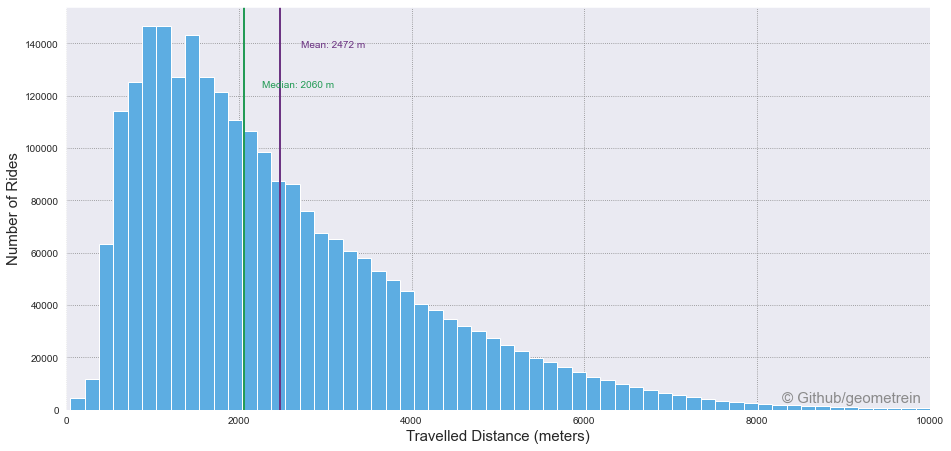

In [10]:
def plot_trips_by_distance(input_df: pd.DataFrame) -> None:
    # Data preparations
    df = input_df.copy()
    data = df['distance']

    # Creating Figure
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    # Plotting the histogram
    plt.hist(data, bins = 60, color='#5DADE2')

     # Adding median and mean lines
    plt.axvline(df['distance'].mean(), color='#6C3483', linestyle='-', linewidth=2 )
    plt.axvline(df['distance'].median(), color='#239B56', linestyle='-', linewidth=2 )
    plt.axvline(df['distance'].median(), color='#239B56', linestyle='-', linewidth=2 )

    # Adding median and mean texts
    min_ylim, max_ylim = plt.ylim()
    plt.text(x=df['distance'].mean()*1.1, y=max_ylim*0.9, s='Mean: {:.0f} m'.format(df['distance'].mean()), color='#6C3483',  fontsize=10)
    plt.text(x=df['distance'].median()*1.1, y=max_ylim*0.8, s='Median: {:.0f} m'.format(df['distance'].median()), color='#239B56', fontsize=10)
    ax.set_xlim([0,10000])

    # Labeling Axes
    plt.xlabel('Travelled Distance (meters)', fontsize=15, x=0.5)
    plt.ylabel('Number of Rides', fontsize=15)

    # Adding Grid
    plt.grid(linestyle=':', color='grey')

    # Watermark
    ax.text(
        x=0.99,
        y=0.01,
        s='© Github/geometrein',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='grey',
        fontsize=15,
        alpha=0.9
    )

    plt.show()

plot_trips_by_distance(dataframe)

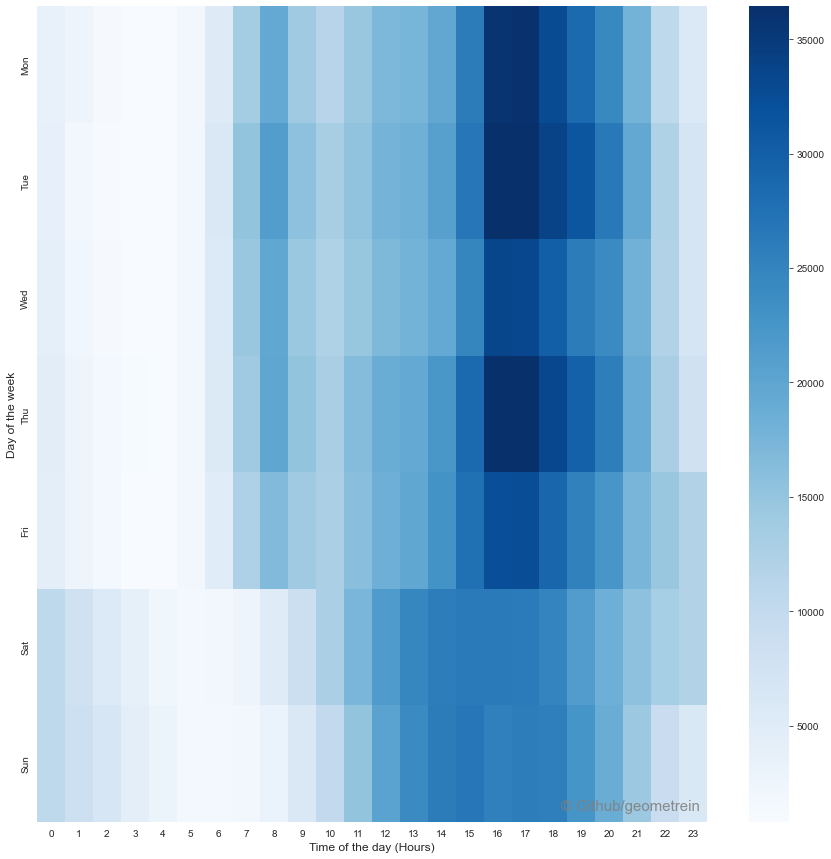

In [11]:
def plot_trips_heatmap(input_df: pd.DataFrame) -> None:
    # Data preparations
    weekdays = ['Mon', 'Tue','Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    df = input_df.copy()
    df['hour'] = pd.DatetimeIndex(df['departure']).hour
    df['weekday'] = pd.DatetimeIndex(df['departure']).weekday
    daily_activity = df.groupby(by=['weekday','hour']).count()['departure_name'].unstack()

    # Figure
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(daily_activity, robust=True, cmap='Blues', yticklabels=weekdays)

    # Labeling Axes
    plt.xlabel('Time of the day (Hours)', fontsize=12, x=0.5)
    plt.ylabel('Day of the week', fontsize=12)

    # Watermark
    ax.text(
        x=0.99,
        y=0.01,
        s='© Github/geometrein',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='grey',
        fontsize=15,
        alpha=0.9
    )


plot_trips_heatmap(dataframe)

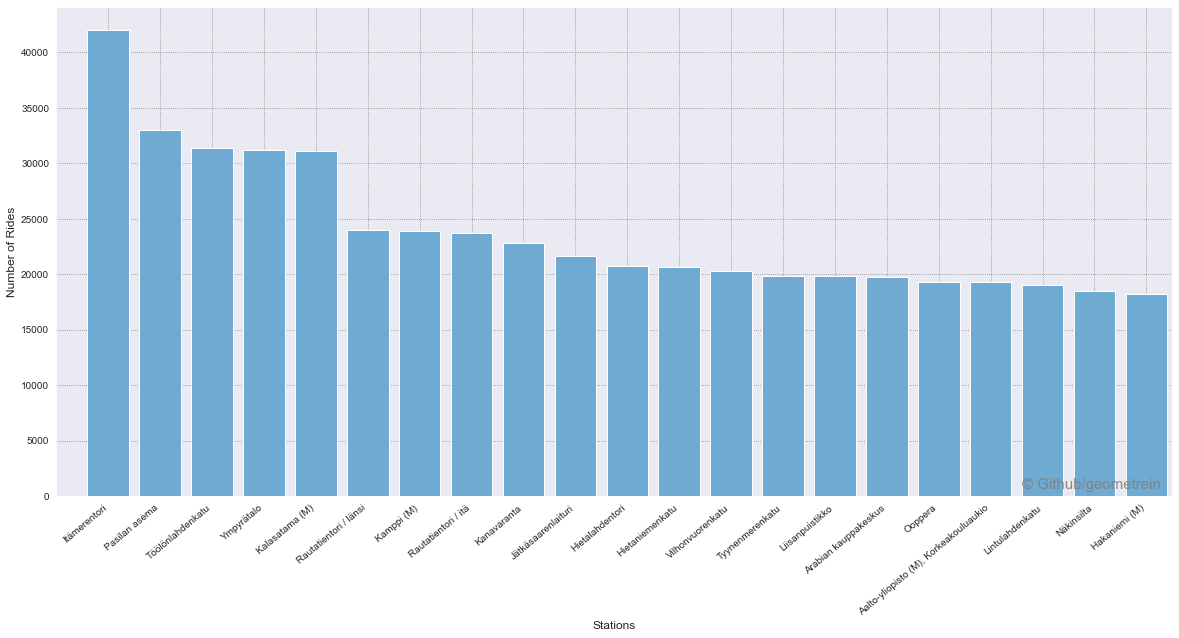

In [12]:
def plot_top_departure_stations(input_df):
    # Data
    df = input_df.copy()

    # Figure
    fig, ax = plt.subplots(figsize=(20,9))
    sns.countplot(x='departure_name', color='#5DADE2', data=df, order=df['departure_name'].value_counts().index, ax=ax)

    # Labeling Axes
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    plt.xlabel('Stations', fontsize=12, x=0.5)
    plt.ylabel('Number of Rides', fontsize=12)
    plt.xlim(-1,  20.5)

    # Adding Grid
    plt.grid(linestyle=':', color='grey')

    # Watermark
    ax.text(
        x=0.99,
        y=0.01,
        s='© Github/geometrein',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='grey',
        fontsize=15,
        alpha=0.9
    )

plot_top_departure_stations(dataframe)

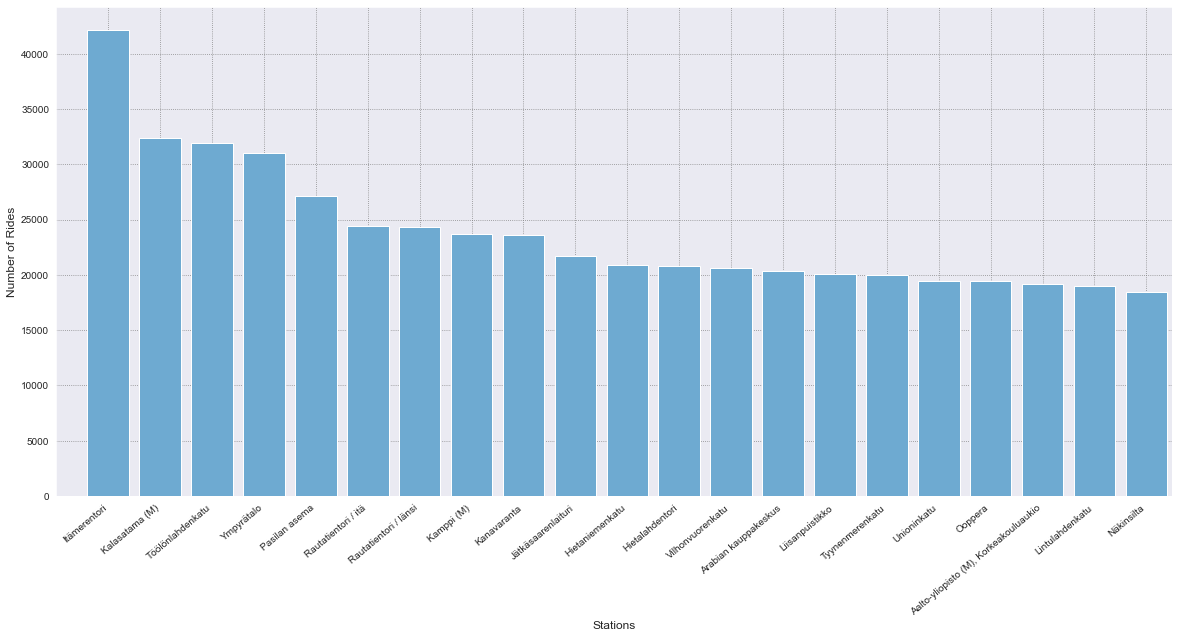

In [13]:
def plot_top_return_stations(input_df: pd.DataFrame) -> None:
    # Data
    df = input_df.copy()

    # Figure
    fig = plt.figure(figsize=(20,9))
    ax = sns.countplot(x='return_name', color='#5DADE2', data=df, order = df['return_name'].value_counts().index)

    # Labeling Axes
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    plt.xlabel('Stations', fontsize=12, x=0.5)
    plt.ylabel('Number of Rides', fontsize=12)
    plt.xlim(-1, 20.5)

    # Adding Grid
    plt.grid(linestyle=':', color='grey')

plot_top_return_stations(dataframe)

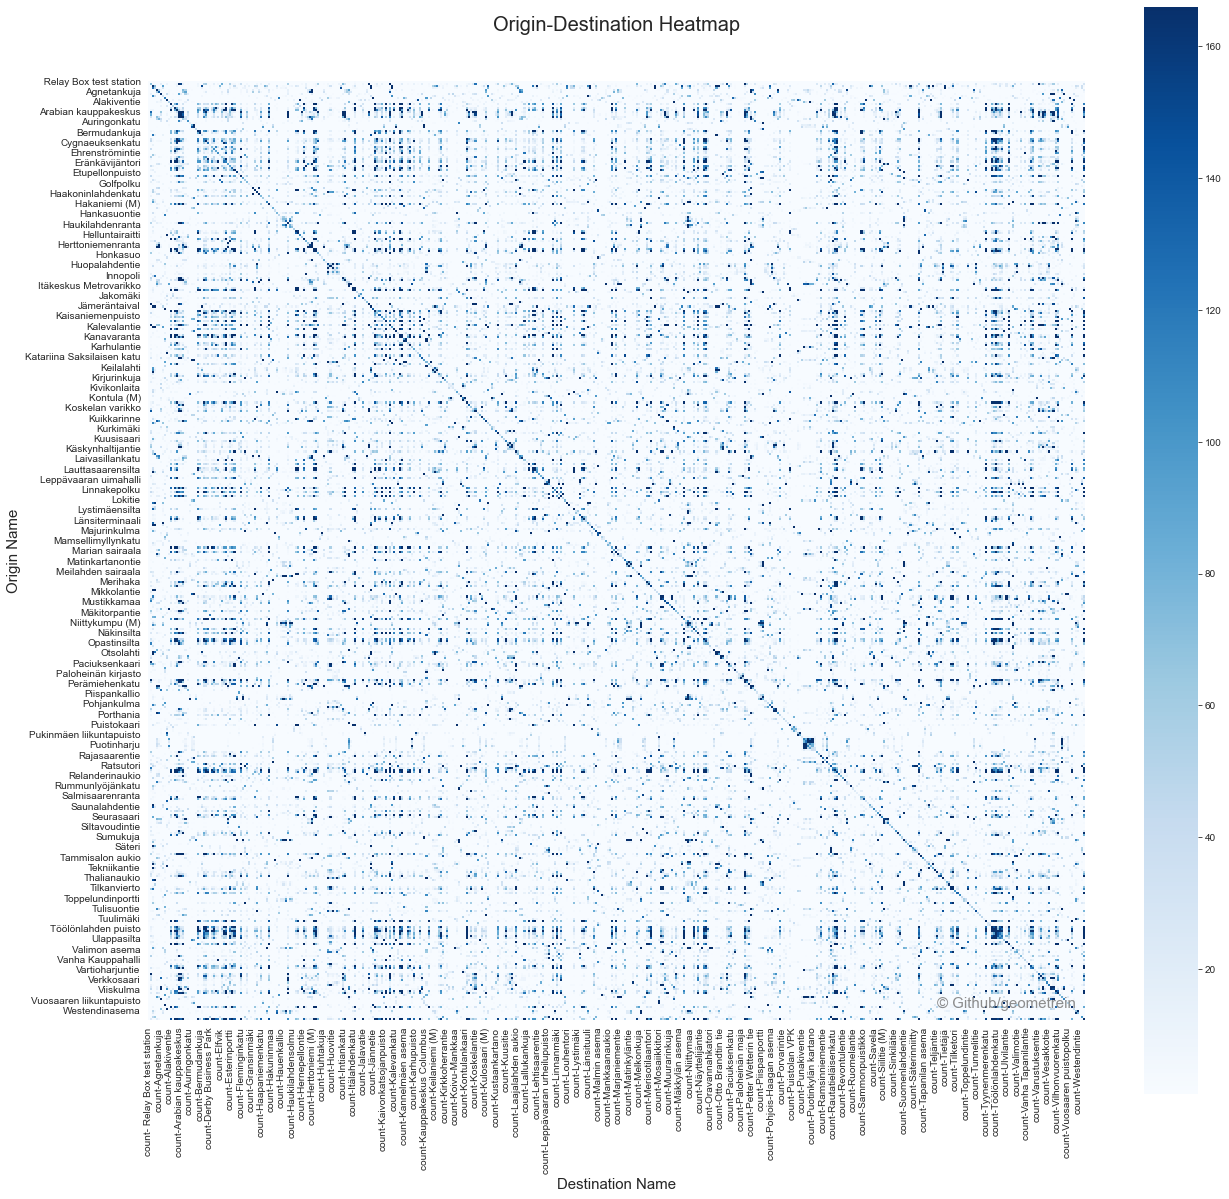

In [14]:
def plot_origin_destination_heatmap(input_df: pd.DataFrame) -> None:
    # Data Preparations
    df = input_df.copy()
    df = df.groupby(['departure_name', 'return_name']).size().sort_values(ascending=False).reset_index()
    df.columns.values[2] = 'count'

    # Color scale for heatmap
    min_value = df['count'].quantile(0.05)
    max_value = df['count'].quantile(0.95)

    # Pivot
    df = df.pivot_table(index='departure_name', columns='return_name', fill_value=0)
    df.sort_index(level=0, ascending=True, inplace=True)

    # Figure
    fig, ax = plt.subplots(figsize=(21,20))
    sns.heatmap(df, vmin=min_value, vmax=max_value, cmap='Blues', square=True)
    
    # Labeling
    ax.set_title('Origin-Destination Heatmap', fontdict={'fontsize':20}, pad=50)
    ax.set_xlabel('Destination Name', fontsize=15, x=0.5)
    ax.set_ylabel('Origin Name', fontsize=15)

    # Watermark
    ax.text(
        x=0.99,
        y=0.01,
        s='© Github/geometrein',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='grey',
        fontsize=15,
        alpha=0.9
    )

plot_origin_destination_heatmap(dataframe)